In [113]:
#Library
import scipy.io
import pandas as pd
from scipy.stats import norm
from numpy import mean
from numpy import std
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import accuracy_score

### Load the dataset

In [118]:
data = scipy.io.loadmat('t104.mat') 

In [119]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Nov  9 16:24:04 2017',
 '__version__': '1.0',
 '__globals__': [],
 'class': array([[2, 1, 1, 2]], dtype=uint8),
 'data': array([[2, 2, 3, 3],
        [2, 3, 2, 3]], dtype=uint8)}

In [120]:
d = {'col1': data['data'][0], 'col2': data['data'][1], 'class': data['class'][0]}
df = pd.DataFrame(data=d)
df

,col1,col2,class
0,2,2,2
1,2,3,1
2,3,2,1
3,3,3,2


### Train n Test the data with original dataset 

In [121]:
X_train= df.drop('class',axis=1)
y_train = df['class']
X_test= X_train
y_test= y_train

In [122]:
X_test

,col1,col2
0,2,2
1,2,3
2,3,2
3,3,3


In [123]:
from sklearn.linear_model import LogisticRegression

clf =  LogisticRegression().fit(X_train, y_train)
pred=clf.predict(X_test)

print('accuracy:', accuracy_score(y_test, pred))


accuracy: 0.5


In [124]:
OriginalVsPredictedlabel = pd.DataFrame({'Original class':y_test, 'predicted class': pred})
OriginalVsPredictedlabel

,Original class,predicted class
0,2,1
1,1,1
2,1,1
3,2,1


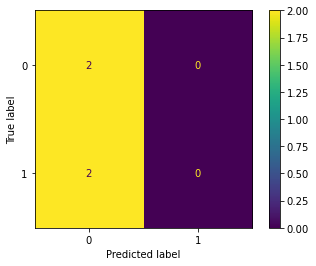

In [125]:
#heatmap

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### We insert more data to check the accuracy level.

In [126]:
x=[0,1,2,3,4,6,7,8,9]
x1=[0,1,2,3,4,6,7,8,9]

x_train=[]
y_train=[]

for i in x:
    for y in x1:
        x_train.append([i,y])
        if i==y:
            y_train.append(2)
        else:
            y_train.append(1)


print(x_train)
print(y_train)

x_test=x_train
y_test=y_train

print(len(x_test))

print(len(y_test))

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 6], [0, 7], [0, 8], [0, 9], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 6], [1, 7], [1, 8], [1, 9], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 6], [2, 7], [2, 8], [2, 9], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 6], [3, 7], [3, 8], [3, 9], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 6], [4, 7], [4, 8], [4, 9], [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 6], [6, 7], [6, 8], [6, 9], [7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [7, 6], [7, 7], [7, 8], [7, 9], [8, 0], [8, 1], [8, 2], [8, 3], [8, 4], [8, 6], [8, 7], [8, 8], [8, 9], [9, 0], [9, 1], [9, 2], [9, 3], [9, 4], [9, 6], [9, 7], [9, 8], [9, 9]]
[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
81
81


In [127]:
from sklearn.linear_model import LogisticRegression

clf =  LogisticRegression().fit(x_train, y_train)
pred=clf.predict(x_test)

print('accuracy:', accuracy_score(y_test, pred))


accuracy: 0.8888888888888888


In [128]:
OriginalVsPredictedlabel = pd.DataFrame({'Original class':y_test, 'predicted class': pred})
OriginalVsPredictedlabel

,Original class,predicted class
0,2,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
76,1,1
77,1,1
78,1,1
79,1,1


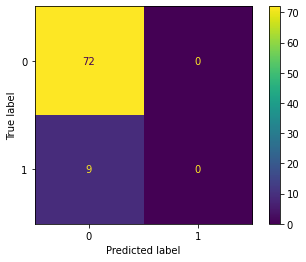

In [129]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### From this observation, we can say that, Linear classifier is not workable for XOR gate. We need to use another machine learning model for it.